In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

## Analysis

In [2]:
def best_so_far_analysis(results):
    
    # Looking for best so far result for each simulation separately
    best_so_far = np.zeros([results.shape[0], results.shape[2]])

    for sim_i in range(results.shape[2]):
        result = results[:, :, sim_i]

        for step_i in range(results.shape[0]):
            if step_i == 0: best_so_far[step_i, sim_i] = results[step_i, 1, sim_i]
            else:
                if results[step_i, 1, sim_i] < best_so_far[step_i-1, sim_i]: 
                    best_so_far[step_i, sim_i] = results[step_i, 1, sim_i]
                else:
                    best_so_far[step_i, sim_i] = best_so_far[step_i-1, sim_i]
    
    # Best so far statistics for each step
    best_so_far_stats = np.zeros([results.shape[0], 4])

    for step_i in range(results.shape[0]):
        best_so_far_stats[step_i, 0] = step_i
        best_so_far_stats[step_i, 1] = np.average(best_so_far[step_i])
        best_so_far_stats[step_i, 2] = np.std(best_so_far[step_i])
        best_so_far_stats[step_i, 3] = np.min(best_so_far[step_i])
    
    return best_so_far_stats

## Reading and analysing BO results

In [3]:
pkl_file = open('bo_10_results.pkl', 'rb')
results_bo = pickle.load(pkl_file)
pkl_file.close()

best_bo_stats = best_so_far_analysis(results_bo)

## Reading and analysing SBO results

In [4]:
pkl_file = open('sbo_10_results.pkl', 'rb')
results_sbo = pickle.load(pkl_file)
pkl_file.close()

best_sbo_stats = best_so_far_analysis(results_sbo)

## Plotting

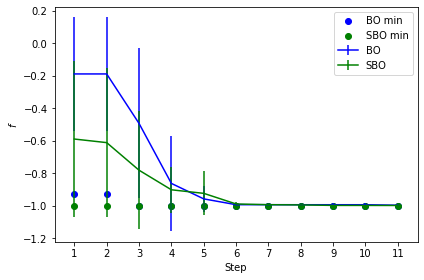

In [5]:
x = np.arange(max(len(best_bo_stats[:, 0]), len(best_sbo_stats[:, 0]))) + 1

plt.errorbar(x, best_bo_stats[:, 1], best_bo_stats[:, 2], 
             color="blue", label="BO")
plt.scatter(x, best_bo_stats[:, 3], 
            color="blue", label="BO min")

plt.errorbar(x, best_sbo_stats[:, 1], best_sbo_stats[:, 2],
             color="green", label="SBO")
plt.scatter(x, best_sbo_stats[:, 3], 
            color="green", label="SBO min")

plt.xticks(x)
plt.xlabel('Step')
plt.ylabel('$f$')
plt.tight_layout()
plt.legend();

plt.savefig('SBO_BO_compr.png', dpi=300)